In [1]:
#dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

In [2]:
#import and read in csv
nuance_df = pd.read_csv("Sales_Item_Merged.csv")
nuance_df['year'] = pd.DatetimeIndex(nuance_df['Date_Invoice']).year.astype(object)
nuance_df['month'] = pd.DatetimeIndex(nuance_df['Date_Invoice']).month.astype(object)
nuance_df

,Silo,Silo_Description,Cust_ID,name_cust,id_st,Date_Invoice,id_item,descr_1,qty_ship,price_net,code_cat_prdt,category,flag_stat_item,code_comm,Item_Add_date,year,month
0,I,Industrial,22777,USHER OIL COMPANY,MI,3/18/2019,1000ABS550,ACTIV VIII,8,1750.56,10,AC8000 MOD,A,FNSG,6/12/2015,2019,3
1,I,Industrial,22777,USHER OIL COMPANY,MI,5/21/2019,1000ABS550,ACTIV VIII,8,1838.08,10,AC8000 MOD,A,FNSG,6/12/2015,2019,5
2,I,Industrial,22777,USHER OIL COMPANY,MI,2/11/2020,1000ABS550,ACTIV VIII,4,919.04,10,AC8000 MOD,A,FNSG,6/12/2015,2020,2
3,I,Industrial,22777,USHER OIL COMPANY,MI,4/6/2020,1000ABS550,ACTIV VIII,4,919.04,10,AC8000 MOD,A,FNSG,6/12/2015,2020,4
4,I,Industrial,22777,USHER OIL COMPANY,MI,8/19/2020,1000ABS550,ACTIV VIII,4,919.04,10,AC8000 MOD,A,FNSG,6/12/2015,2020,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23367,I,Industrial,1801,MSP INDUSTRIES,MI,9/27/2019,ZS401,BRUSH-SPIRAL WRAP SCRUB BRUSH,2,1139.50,ZS,PDQ PARTS,A,FNSG,9/24/2019,2019,9
23368,J,JanSan,1000,SAMPLE ORDER,OH,10/21/2019,ZS402,BRUSH-HI DENSITY SCRUB BRUSH,2,822.50,ZS,PDQ PARTS,A,FNSG,10/11/2019,2019,10
23369,J,JanSan,1000,SAMPLE ORDER,OH,10/21/2019,ZS403,BRUSH-SIDE SCRUB BRUSH,1,207.00,ZS,PDQ PARTS,A,FNSG,10/11/2019,2019,10
23370,I,Industrial,12663,"LIBERTY STEEL INDUSTRIES, INC.",OH,10/24/2019,ZS404,BRUSH-GRIT SIDE SCRUB BRUSH.,1,469.00,ZS,PDQ PARTS,A,FNSG,10/14/2019,2019,10


## Top Items

In [3]:
#2019 data frame
twenty_19_sales = nuance_df.loc[nuance_df['year']== 2019]

#2020 data frame
twenty_20_sales = nuance_df.loc[nuance_df['year']== 2020]

In [4]:
# Determine Top Items 2019
top_items_df_2019 = twenty_19_sales.groupby(["id_item", "descr_1"]).sum()
top_items_df_2019.sort_values(by='qty_ship',
                      ascending=False).head(10)

,,qty_ship,price_net
id_item,descr_1,,
8289PLI600,BORDER 8L 331-TK LAMBERTI,570819,696399.18
6378SEV034,22810 7GEN DISF MULTI SURF,205989,1434360.43
8262PLI600,FS AMS MAX DR BULK 339-TKG,146907,152783.28
1600NUC040,NU-BRITE COIL CLNR (4291-08),135086,2154237.70
8289PLI601,BORDER 8L LAMBERTI 331-TK,84710,3388.40
NFCL16RDEA,"PINK 300GSM 16""CLOTH RD CORNER",68952,38243.88
NFCL16BLEA,NUFIBER GLASS/MIRR 16X16 BLUE,66384,56403.36
NFCL16BUEA,"BLUE 300GSM 16""CLOTH RD CORNER",65472,38664.24
NFCL16GREA,"GREEN 300GSM 16""CLTH RD CORNER",60036,35194.44


In [5]:
# Determine Top Items 2020
top_items_df_2020 = twenty_20_sales.groupby(["id_item", "descr_1"]).sum()
top_items_df_2020.sort_values(by='qty_ship',
                      ascending=False).head(10)

,,qty_ship,price_net
id_item,descr_1,,
8289PLI600,BORDER 8L 331-TK LAMBERTI,519108,633311.76
8289PLI601,BORDER 8L LAMBERTI 331-TK,188231,7801.82
1805EUP080,SHARK COMET VCM60 WATERFALL,149567,1112778.82
6378SEV034,22810 7GEN DISF MULTI SURF,148560,1175026.38
7073MMM030,3M TB QUAT DISINFECTANT,137873,1126422.41
8262PLI600,FS AMS MAX DR BULK 339-TKG,127910,133026.40
6378SEV037,22810 SEV DISF MULTI SURF,121394,965766.16
1600NUC040,NU-BRITE COIL CLNR (4291-08),114768,1825958.88
NFCL12BUEA,BLUE 12'CLOTH RND CORNER,105348,40236.36


In [6]:
new_new_df_2019 = top_items_df_2019.reset_index(level=0).sort_values(by='qty_ship',
                      ascending=False)
new_new_df_2019.head(10)

,id_item,qty_ship,price_net
descr_1,,,
BORDER 8L 331-TK LAMBERTI,8289PLI600,570819,696399.18
22810 7GEN DISF MULTI SURF,6378SEV034,205989,1434360.43
FS AMS MAX DR BULK 339-TKG,8262PLI600,146907,152783.28
NU-BRITE COIL CLNR (4291-08),1600NUC040,135086,2154237.70
BORDER 8L LAMBERTI 331-TK,8289PLI601,84710,3388.40
"PINK 300GSM 16""CLOTH RD CORNER",NFCL16RDEA,68952,38243.88
NUFIBER GLASS/MIRR 16X16 BLUE,NFCL16BLEA,66384,56403.36
"BLUE 300GSM 16""CLOTH RD CORNER",NFCL16BUEA,65472,38664.24
"GREEN 300GSM 16""CLTH RD CORNER",NFCL16GREA,60036,35194.44


In [7]:
new_new_df_2020 = top_items_df_2020.reset_index(level=0).sort_values(by='qty_ship',
                      ascending=False)
new_new_df_2020.head(10)

,id_item,qty_ship,price_net
descr_1,,,
BORDER 8L 331-TK LAMBERTI,8289PLI600,519108,633311.76
BORDER 8L LAMBERTI 331-TK,8289PLI601,188231,7801.82
SHARK COMET VCM60 WATERFALL,1805EUP080,149567,1112778.82
22810 7GEN DISF MULTI SURF,6378SEV034,148560,1175026.38
3M TB QUAT DISINFECTANT,7073MMM030,137873,1126422.41
FS AMS MAX DR BULK 339-TKG,8262PLI600,127910,133026.40
22810 SEV DISF MULTI SURF,6378SEV037,121394,965766.16
NU-BRITE COIL CLNR (4291-08),1600NUC040,114768,1825958.88
BLUE 12'CLOTH RND CORNER,NFCL12BUEA,105348,40236.36


<AxesSubplot:title={'center':'Top Products 2019'}, xlabel='Product Name', ylabel='Quantity'>

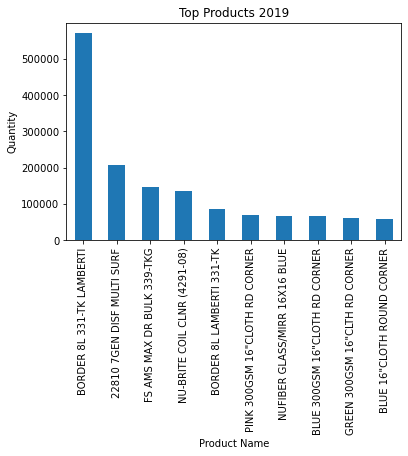

In [8]:
plot_2019 = new_new_df_2019['qty_ship'].head(10).plot(kind="bar")
plot_2019.set_xlabel("Product Name")
plot_2019.set_ylabel("Quantity")
plot_2019.set_title("Top Products 2019")

plot_2019

<AxesSubplot:title={'center':'Top Products 2020'}, xlabel='Product Name', ylabel='Quantity'>

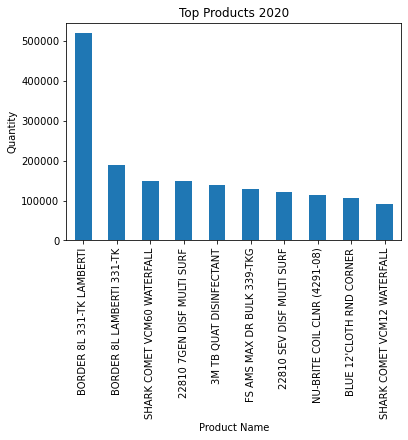

In [9]:
plot_2020 = new_new_df_2020['qty_ship'].head(10).plot(kind="bar")
plot_2020.set_xlabel("Product Name")
plot_2020.set_ylabel("Quantity")
plot_2020.set_title("Top Products 2020")

plot_2020

In [41]:
twenty19_labels = new_new_df_2019.head(10).index
twenty20_labels = new_new_df_2020.head(10).index

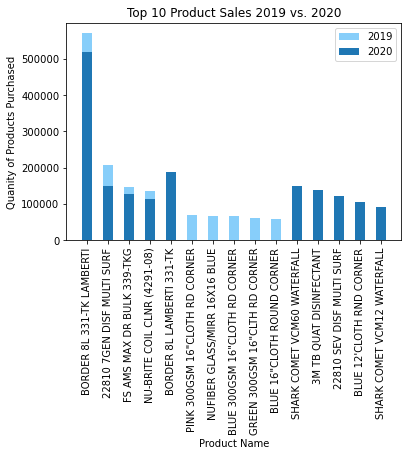

In [42]:
plt.bar(height = new_new_df_2019['qty_ship'].head(10), x = twenty19_labels, width = .5, color="lightskyblue")
plt.bar(height = new_new_df_2020['qty_ship'].head(10), x = twenty20_labels, width = .5)
plt.title("Top 10 Product Sales 2019 vs. 2020")
plt.xticks(rotation=90)
plt.legend(['2019', '2020'], loc='upper right')
plt.savefig("top10products.png", bbox_inches="tight", facecolor="w")
plt.xlabel("Product Name")
plt.ylabel("Quanity of Products Purchased")
plt.show()

# Top Customers

In [12]:
# Determine Top Customers
customers_df_2019 = twenty_19_sales.groupby(["name_cust"]).sum().sort_values(by='qty_ship',
                      ascending=False)
customers_df_2019.head(10)

,qty_ship,price_net
name_cust,,
PRECISION LABORATORIES LLC,864689,2666460.58
"NU-CALGON WHOLESALERS, INC.",360572,6472697.02
CLEANWELL LLC,268593,2120676.08
EDWARD DON & CO.,150228,150044.71
ALLIED EAGLE SUPPLY,114000,132238.14
MASSCO MAINTENANCE SUPPLY,73104,113838.30
CHARLOTTE PRODUCTS LTD.,61062,1321758.32
NORTH AMERICAN CORPORATION,60626,72403.35
WAREHOUSE DIRECT,60246,64269.80


In [13]:
customers_df_2020 = twenty_20_sales.groupby(["name_cust"]).sum().sort_values(by='qty_ship',
                      ascending=False)
customers_df_2020.head(10)

,qty_ship,price_net
name_cust,,
PRECISION LABORATORIES LLC,894610,2669188.35
CLEANWELL LLC,405604,4049151.44
"NU-CALGON WHOLESALERS, INC.",322616,5861516.38
SHARK NINJA OPERATING LLC,233532,1823296.33
3M COMPANY,173640,1431028.38
NORTH AMERICAN CORPORATION,135521,95825.13
ALLIED EAGLE SUPPLY,132657,148923.08
EDWARD DON & CO.,86567,108571.77
CHARLOTTE PRODUCTS LTD.,84667,1820047.02


In [39]:
twenty19_labels_customers = customers_df_2019.head(10).index
twenty20_labels_customers = customers_df_2020.head(10).index

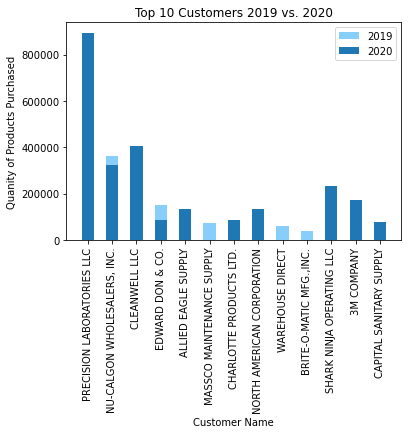

In [59]:
plt.bar(height = customers_df_2019['qty_ship'].head(10), x = twenty19_labels_customers, width = .5, color="lightskyblue")
plt.bar(height = customers_df_2020['qty_ship'].head(10), x = twenty20_labels_customers, width = .5)
plt.title("Top 10 Customers 2019 vs. 2020")
plt.xticks(rotation=90)
plt.legend(['2019', '2020'], loc='upper right')
plt.savefig("top10customers", bbox_inches="tight", facecolor="w")
plt.xlabel("Customer Name")
plt.ylabel("Quanity of Products Purchased")
plt.show()

# Customers vs. Avg Quantity Purchased

In [16]:
#customers and avg quantity
avg_quantity_2019 = twenty_19_sales.groupby(["name_cust"]).mean()
avg_quantity_2019

,qty_ship,price_net
name_cust,,
1ST AYD CORP.,1.285714,194.625714
A & A MAINTENANCE ENTERPRISE,62.013850,118.353767
"A & L SALES, INC.",20.833333,142.252778
"A-Z JANITORIAL SERVICE, LLC",94.014706,208.647206
AAA CONSTRUCTION & DEVELOPMENT,7.333333,11742.786667
...,...,...
"WILBUR ELLIS COMPANY, LLC",36.000000,1890.000000
"YASKAWA AMERICA, INC",1.000000,75.000000
"YASKAWA ELECTRIC AMERICA, INC",1.000000,55.550000


In [17]:
avg_quantity_2020 = twenty_20_sales.groupby(["name_cust"]).mean()
avg_quantity_2020

,qty_ship,price_net
name_cust,,
1ST AYD CORP.,2.000000,353.802105
3M COMPANY,2630.909091,21682.248182
A & A MAINTENANCE ENTERPRISE,84.109375,213.880781
"A & L SALES, INC.",17.650000,173.419500
"A-Z JANITORIAL SERVICE, LLC",174.171429,278.558571
...,...,...
WIESE - ST. LOUIS,11.152542,735.459153
"WILBUR ELLIS COMPANY, LLC",36.000000,1959.840000
"YASKAWA AMERICA, INC",1.000000,78.750000


In [89]:
merged_average = pd.merge(avg_quantity_2019, avg_quantity_2020, on="name_cust").reset_index().sample(15)
merged_average

,name_cust,qty_ship_x,price_net_x,qty_ship_y,price_net_y
8,AIRWAYS SYSTEMS INC.,60.000000,1965.000000,57.800000,1895.398000
156,THORNTON BROTHERS INC,1.111111,568.003333,45.272727,1697.409091
0,1ST AYD CORP.,1.285714,194.625714,2.000000,353.802105
117,PETTUS OFFICE PRODUCTS,129.400000,253.051500,245.023810,325.067143
10,ALL PRO FACILITY SUPPLES,74.208333,293.019583,57.466667,441.779333
165,WAREHOUSE DIRECT,640.914894,683.721277,600.379310,581.030862
48,DISCOUNT JANITOR DEPOT,1.000000,145.140000,1.000000,139.263333
153,"TARTAN SUPPLY CO., INC.",9.095238,225.183810,1.909091,296.708182
119,"PIKE SYSTEMS, INC.",2.200000,169.170000,5.250000,378.520000
159,UNIQUE PRODUCTS,62.435644,237.132228,396.005155,497.836804


In [90]:
print(merged_average["name_cust"].head(15).values)

['AIRWAYS SYSTEMS INC.' 'THORNTON BROTHERS INC' '1ST AYD CORP.'
 'PETTUS OFFICE PRODUCTS' 'ALL PRO FACILITY SUPPLES' 'WAREHOUSE DIRECT'
 'DISCOUNT JANITOR DEPOT' 'TARTAN SUPPLY CO., INC.' 'PIKE SYSTEMS, INC.'
 'UNIQUE PRODUCTS' 'CLOVERLEAF CHEMICAL CO.' 'MARTIN INDUSTRIAL SUPPLY'
 'NATIONAL AMERICAN SALES CORP' 'EDWARD DON & CO.' 'ORAPI CANADA LIMITED']


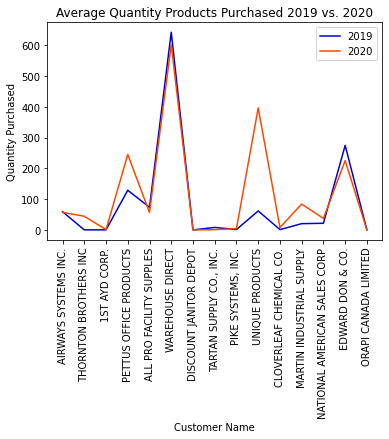

<Figure size 3600x3600 with 0 Axes>

In [91]:
ax=plt.gca()

merged_average.plot(kind='line', x='name_cust', y='qty_ship_x', color="mediumblue", ax=ax)
merged_average.plot(kind='line', x='name_cust', y='qty_ship_y', color="orangered", ax=ax)

plt.xlabel("Customer Name")
plt.ylabel("Quantity Purchased")
plt.title("Average Quantity Products Purchased 2019 vs. 2020")
plt.legend(['2019', '2020'], loc='upper right')
plt.xticks(ticks = np.arange(15), labels =('AIRWAYS SYSTEMS INC.', 'THORNTON BROTHERS INC', '1ST AYD CORP.',
 'PETTUS OFFICE PRODUCTS', 'ALL PRO FACILITY SUPPLES', 'WAREHOUSE DIRECT',
 'DISCOUNT JANITOR DEPOT', 'TARTAN SUPPLY CO., INC.', 'PIKE SYSTEMS, INC.',
 'UNIQUE PRODUCTS', 'CLOVERLEAF CHEMICAL CO.', 'MARTIN INDUSTRIAL SUPPLY',
 'NATIONAL AMERICAN SALES CORP', 'EDWARD DON & CO.', 'ORAPI CANADA LIMITED'))
plt.xticks(rotation=90)
plt.figure(figsize=(50,50))
plt.tight_layout()
plt.savefig("avg_quantity_comparison", facecolor="w", bbox_inches="tight")
plt.show()

# Top 10 Products Bucketed by Category

In [20]:
merge_2019 = pd.merge(new_new_df_2019.head(10), nuance_df, on="descr_1", how="inner").sort_values(by='qty_ship_x',
                      ascending=False)


merge_2019_grouped = merge_2019.groupby(["descr_1", "category"]).sum().sort_values(by='qty_ship_x',
                      ascending=False).reset_index()
merge_2019_grouped.head(10)

,descr_1,category,qty_ship_x,price_net_x,qty_ship_y,price_net_y
0,BORDER 8L 331-TK LAMBERTI,AG-MISC.,143846388,1.754926e+08,1089927,1329710.94
1,22810 7GEN DISF MULTI SURF,EPA - MISC,42639723,2.969126e+08,354549,2609386.81
2,NU-BRITE COIL CLNR (4291-08),NOACIDCOIL,36067962,5.751815e+08,249854,3980196.58
3,"PINK 300GSM 16""CLOTH RD CORNER",NuFiber,20892456,1.158790e+07,152472,88002.96
4,"BLUE 300GSM 16""CLOTH RD CORNER",NuFiber,20492736,1.210191e+07,134548,83461.60
5,"GREEN 300GSM 16""CLTH RD CORNER",NuFiber,17890728,1.048794e+07,112836,69568.20
6,NUFIBER GLASS/MIRR 16X16 BLUE,NuFiber,10488672,8.911731e+06,100656,84129.12
7,"BLUE 16""CLOTH ROUND CORNER",NuFiber,9436800,4.749984e+06,145980,82203.48
8,FS AMS MAX DR BULK 339-TKG,AG-MISC.,9402048,9.778130e+06,274817,285809.68
9,BORDER 8L LAMBERTI 331-TK,AG-MISC.,5590860,2.236344e+05,272941,11190.22


In [21]:
merge_2020 = pd.merge(new_new_df_2020.head(10), nuance_df, on="descr_1", how="inner").sort_values(by='qty_ship_x',
                      ascending=False)


merge_2020_grouped = merge_2020.groupby(["descr_1", "category"]).sum().sort_values(by='qty_ship_x',
                      ascending=False).reset_index()
merge_2020_grouped.head(10)

,descr_1,category,qty_ship_x,price_net_x,qty_ship_y,price_net_y
0,BORDER 8L 331-TK LAMBERTI,AG-MISC.,130815216,1.595946e+08,1089927,1329710.94
1,22810 7GEN DISF MULTI SURF,EPA - MISC,30751920,2.432305e+08,354549,2609386.81
2,NU-BRITE COIL CLNR (4291-08),NOACIDCOIL,30643056,4.875310e+08,249854,3980196.58
3,BLUE 12'CLOTH RND CORNER,NuFiber,15486156,5.914745e+06,124702,47802.68
4,BORDER 8L LAMBERTI 331-TK,AG-MISC.,12423246,5.149201e+05,272941,11190.22
5,SHARK COMET VCM60 WATERFALL,EUROPRO,11666226,8.679675e+07,149567,1112778.82
6,3M TB QUAT DISINFECTANT,AIRX PROD,8961745,7.321746e+07,173620,1430629.38
7,FS AMS MAX DR BULK 339-TKG,AG-MISC.,8186240,8.513690e+06,274817,285809.68
8,22810 SEV DISF MULTI SURF,EPA - MISC,7769216,6.180903e+07,121394,965766.16
9,SHARK COMET VCM12 WATERFALL,EUROPRO,4689880,1.524211e+08,90190,2931175.00


In [22]:
merge_2019_grouped["category"].value_counts()

NuFiber       5
AG-MISC.      3
NOACIDCOIL    1
EPA - MISC    1
Name: category, dtype: int64

In [23]:
merge_2020_grouped["category"].value_counts()

AG-MISC.      3
EPA - MISC    2
EUROPRO       2
NOACIDCOIL    1
NuFiber       1
AIRX PROD     1
Name: category, dtype: int64

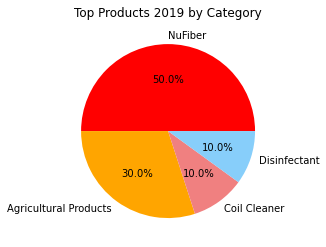

In [24]:
#2019 Plot
labels = ["NuFiber", "Agricultural Products", "Coil Cleaner", "Disinfectant"]
colors = ["red", "orange", "lightcoral", "lightskyblue"]

values = merge_2019_grouped["category"].value_counts()

plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title("Top Products 2019 by Category")
plt.savefig("top_prod_by_category_2019", bbox_inches="tight")
plt.show()

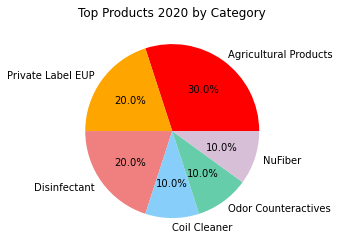

In [25]:
#2020 Plot
labels = ["Agricultural Products", "Private Label EUP", "Disinfectant", "Coil Cleaner", "Odor Counteractives", "NuFiber"]
colors = ["red", "orange", "lightcoral", "lightskyblue", "mediumaquamarine", "thistle"]

values = merge_2020_grouped["category"].value_counts()

plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title("Top Products 2020 by Category")
plt.savefig("top_prod_by_category_2020", bbox_inches="tight")
plt.show()

# Top Customers by Silo

In [47]:
merge_2019_customers = pd.merge(customers_df_2019.head(10), nuance_df, on="name_cust", how="inner").sort_values(by='qty_ship_x',
                      ascending=False)


merge_2019_grouped_customers = merge_2019_customers.groupby(["name_cust", "Silo_Description"]).sum().sort_values(by='qty_ship_x',
                      ascending=False).reset_index()
merge_2019_grouped_customers.head(10)

,name_cust,Silo_Description,qty_ship_x,price_net_x,qty_ship_y,price_net_y
0,PRECISION LABORATORIES LLC,Specialty,647652061,1.997179e+09,1759299,5335648.93
1,"NU-CALGON WHOLESALERS, INC.",Specialty,307928488,5.527683e+09,683188,12334213.40
2,CLEANWELL LLC,Contract,219709074,1.734713e+09,674197,6169827.52
3,EDWARD DON & CO.,JanSan,139862268,1.396916e+08,236795,258616.48
4,CHARLOTTE PRODUCTS LTD.,Contract,73274400,1.586110e+09,145729,3141805.34
5,MASSCO MAINTENANCE SUPPLY,JanSan,55997664,8.720014e+07,115880,195898.83
6,ALLIED EAGLE SUPPLY,JanSan,39786000,4.615111e+07,246657,281161.22
7,NORTH AMERICAN CORPORATION,JanSan,14489614,1.730440e+07,196147,168228.48
8,WAREHOUSE DIRECT,JanSan,9157392,9.769010e+06,95068,97969.59
9,"BRITE-O-MATIC MFG.,INC.",Industrial,1410290,1.201101e+07,75832,612230.57


In [49]:
merge_2019_grouped_customers["Silo_Description"].value_counts()

JanSan        5
Contract      2
Specialty     2
Industrial    1
Name: Silo_Description, dtype: int64

In [48]:
merge_2020_customers = pd.merge(customers_df_2020.head(10), nuance_df, on="name_cust", how="inner").sort_values(by='qty_ship_x',
                      ascending=False)


merge_2020_grouped_customers = merge_2020_customers.groupby(["name_cust", "Silo_Description"]).sum().sort_values(by='qty_ship_x',
                      ascending=False).reset_index()
merge_2020_grouped_customers.head(10)

,name_cust,Silo_Description,qty_ship_x,price_net_x,qty_ship_y,price_net_y
0,PRECISION LABORATORIES LLC,Specialty,670062890,1.999222e+09,1759299,5335648.93
1,CLEANWELL LLC,Contract,331784072,3.312206e+09,674197,6169827.52
2,"NU-CALGON WHOLESALERS, INC.",Specialty,275514064,5.005735e+09,683188,12334213.40
3,CHARLOTTE PRODUCTS LTD.,Contract,101600400,2.184056e+09,145729,3141805.34
4,EDWARD DON & CO.,JanSan,80593877,1.010803e+08,236795,258616.48
5,CAPITAL SANITARY SUPPLY,JanSan,61498231,1.618340e+08,109013,394759.22
6,ALLIED EAGLE SUPPLY,JanSan,46297293,5.197415e+07,246657,281161.22
7,NORTH AMERICAN CORPORATION,JanSan,32389519,2.290221e+07,196147,168228.48
8,SHARK NINJA OPERATING LLC,Contract,30592692,2.388518e+08,260265,1979290.39
9,3M COMPANY,Contract,11460240,9.444787e+07,173640,1431028.38


In [50]:
merge_2020_grouped_customers["Silo_Description"].value_counts()

Contract     4
JanSan       4
Specialty    2
Name: Silo_Description, dtype: int64

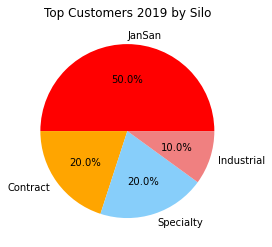

In [55]:
#2019 Plot
labels = ["JanSan", "Contract", "Specialty", "Industrial"]
colors = ["red", "orange", "lightskyblue", "lightcoral"]

values = merge_2019_grouped_customers["Silo_Description"].value_counts()

plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title("Top Customers 2019 by Silo")
plt.savefig("top_customers_by_silo_2019", bbox_inches="tight")
plt.show()

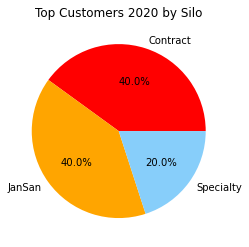

In [56]:
#2020 Plot
labels = ["Contract", "JanSan", "Specialty"]
colors = ["red", "orange", "lightskyblue"]

values = merge_2020_grouped_customers["Silo_Description"].value_counts()

plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title("Top Customers 2020 by Silo")
plt.savefig("top_customers_by_silo_2020", bbox_inches="tight")
plt.show()

# Major Findings

What are the top items for 2019 and 2020?
    When looking at the quantity of products purchased in 2019, we can see that NuFiber (Microfiber towel line) took over a major portion of quantity sales that year. Interestingly, in 2020 we see other types of products - such as disinfectants and floor cleaners - break the top 10 and almost completely knock NuFiber out of the top. 
    
Who are the top customers for 2019 and 2020?
    We can see that the top customers fell into the same groups of silos, relatively. We see that industrial companies had a larger impact in 2019, where Contract took up more of the top proportions in 2020.
    
Did customers buy more products in 2020?
    On average we can see that customers purchased larger quantities of cleaning products from Nuance in 2020 than they did in 2019.